# Hierarchial Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [3]:
url = 'D:\Sem 6\EDA\Project\data\Bank-Customer-Profiling-and-Segmentation-main\Bank-Customer-Profiling-and-Segmentation-main\data\marketing_data.csv'
raw_df = pd.read_csv(url)
raw_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [5]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  

normalized_df = pd.DataFrame(scaled_df,columns=raw_df.columns) 
  
# Reducing the dimensions of the data 


pca = PCA(n_components=0.9, random_state=42)
pca.fit(normalized_df)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(normalized_df), columns=PC_names)
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.680592,-1.077444,0.496943,0.658495,0.012701,0.047827,0.830649,-0.035403,0.111142,-0.077702
1,-1.140879,2.505965,0.597102,-0.124699,0.592112,-1.144540,-0.372355,0.106184,0.693202,-0.777543
2,0.970322,-0.382118,0.109572,1.211134,-2.163663,-0.186870,-1.586148,-0.140570,-0.891229,-0.002013
3,-0.879490,0.026131,1.495628,1.093392,0.242364,-0.156743,-0.253413,-0.621407,-0.135517,0.393996
4,-1.598361,-0.689881,0.375775,0.984478,-0.491617,0.077998,0.707129,0.201372,0.586277,-0.121706


<b>Dendograms </b> are used to divide a given cluster into many different clusters.

In [6]:
normalized_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960417,-0.528979,-0.305334,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688654,0.818642,0.087140,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826076,-0.383805,-0.100110,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826076,-0.598688,-0.100110,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905448,-0.364368,-0.261038,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960417,-0.486217,-0.343462,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960417,-0.503396,-0.343462,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960417,-0.570615,-0.329354,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097840,-0.580536,-0.340572,0.329200,-4.122768


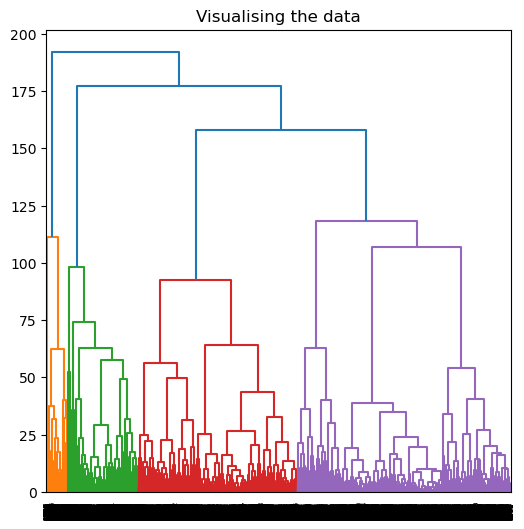

In [7]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(pca_data, method ='ward'))) 

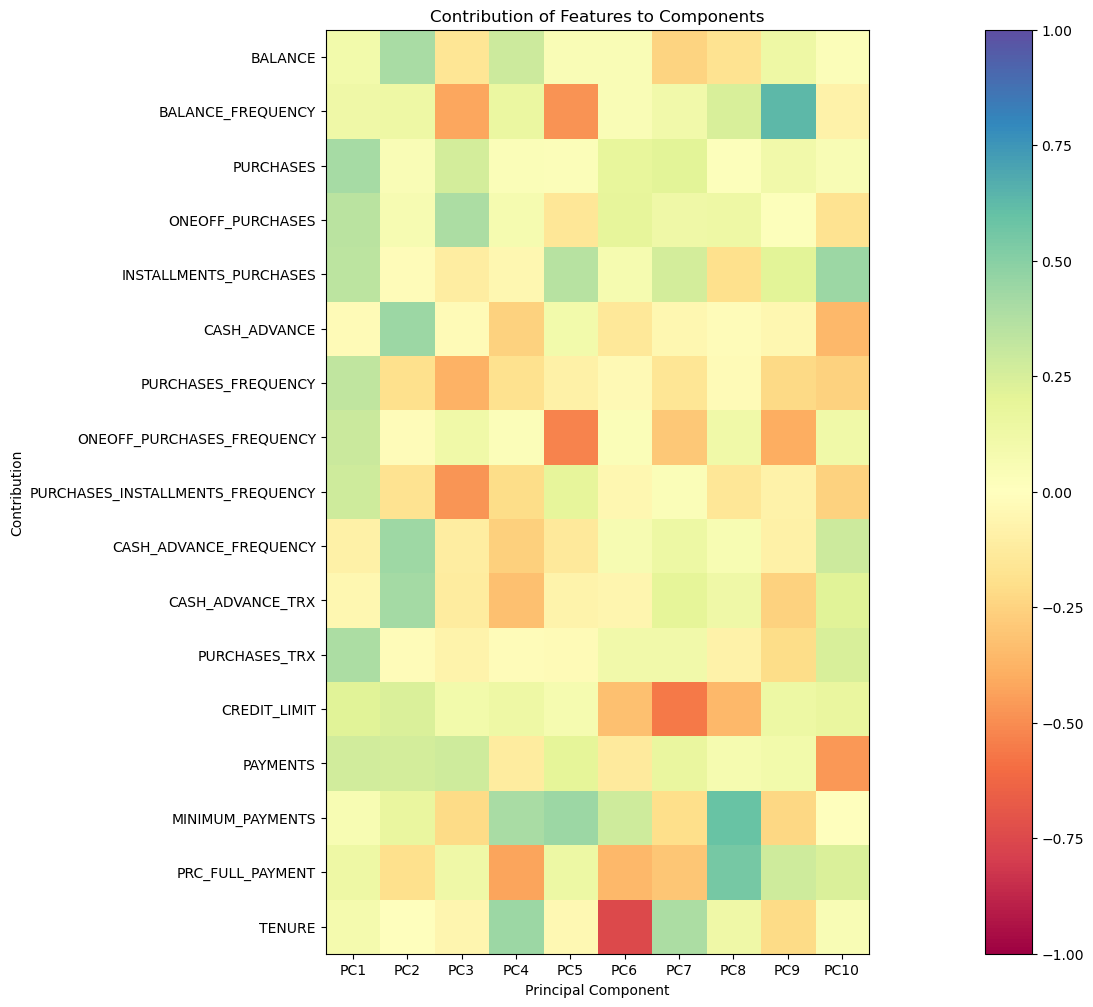

In [8]:
fig, ax = plt.subplots(figsize=(30, 12))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1
          )
plt.yticks(range(len(normalized_df.columns)), normalized_df.columns)
plt.xticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

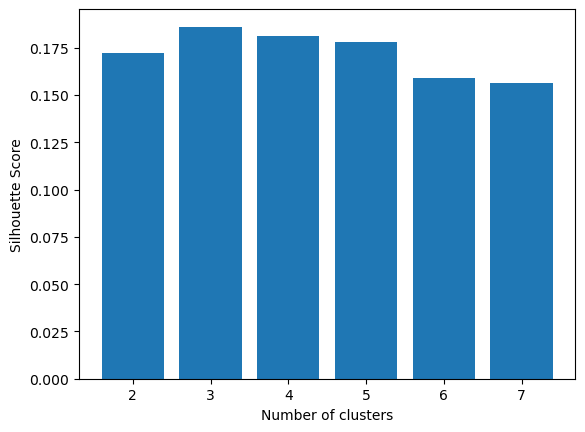

In [23]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_df, 
                         AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [26]:
agg = AgglomerativeClustering(n_clusters = 5)
labels_std=agg.fit_predict(normalized_df)

In [27]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
print(f'Davies-Bouldin index = {davies_bouldin_score(normalized_df, labels_std)}')
print(f'Silhouette Score = {silhouette_score(normalized_df, labels_std)}')

Davies-Bouldin index = 1.5389316167218194
Silhouette Score = 0.17787256812452404


Determine the optimal number of clusters using <b> [Silhouette Score](https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation)</b>.

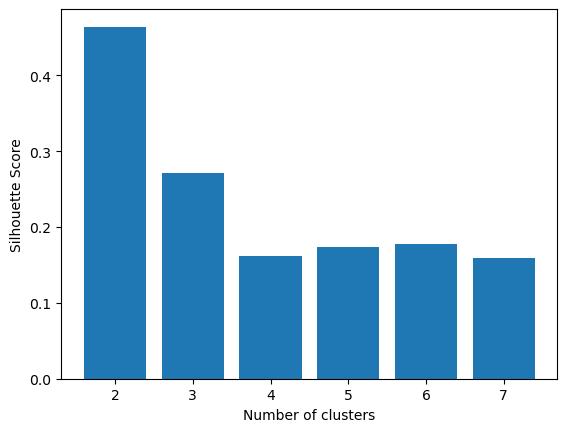

In [12]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(pca_data, 
                         AgglomerativeClustering(n_clusters = n_cluster).fit_predict(pca_data))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Building and Visualized clustering model for k = 3

In [13]:
agg = AgglomerativeClustering(n_clusters = 3)
labels=agg.fit_predict(pca_data)

In [14]:
raw_df['LABELS'] = labels
normalized_df['LABELS'] = labels
pca_data['LABELS'] = labels

<AxesSubplot:ylabel='LABELS'>

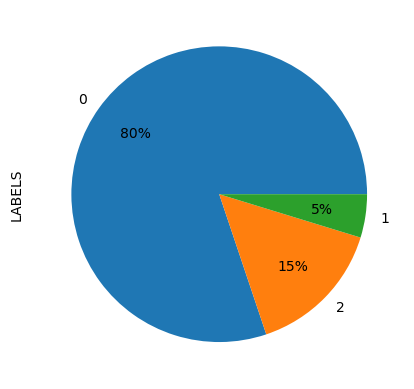

In [15]:
pca_data.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [16]:

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
print(f'Davies-Bouldin index = {davies_bouldin_score(pca_data, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_data, labels)}')

Davies-Bouldin index = 1.3838774186977716
Silhouette Score = 0.3171232778865317


In [17]:
def spider_plot(data, title):
    means = data.groupby("LABELS").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()

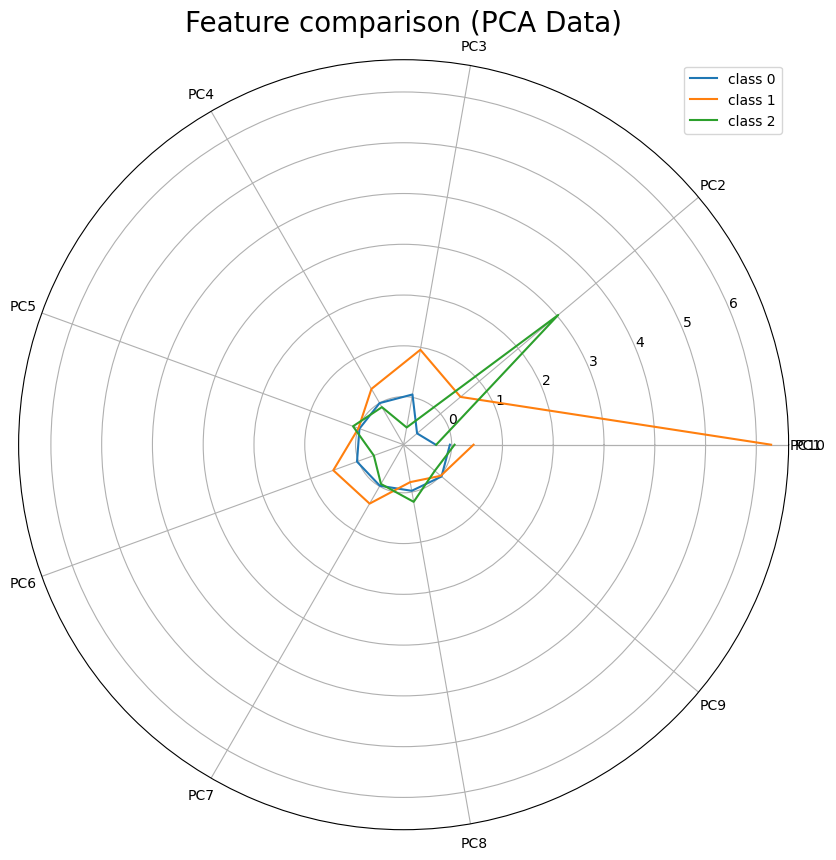

In [18]:
spider_plot(pca_data, 'PCA Data')

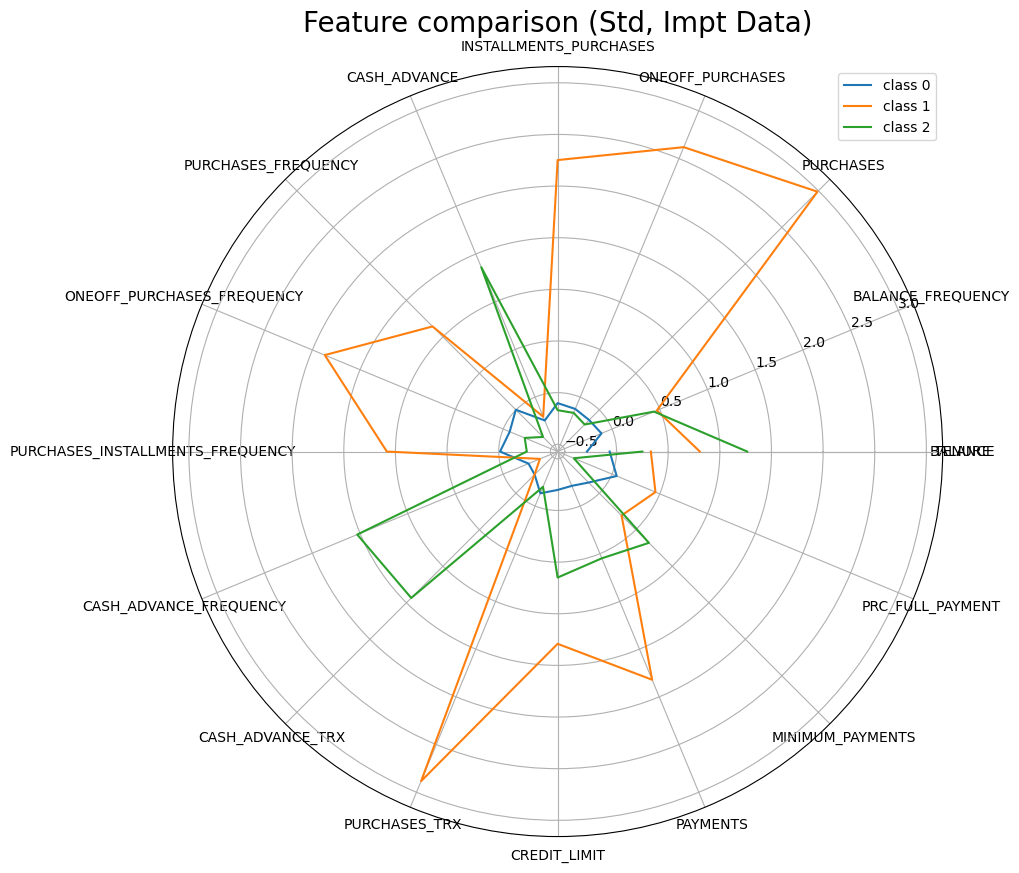

In [19]:
spider_plot(normalized_df, 'Std, Impt Data')

In [20]:
import seaborn as sns
def colorful_scatter(data):   
    LABEL_COLOR_MAP = {0 : 'y',
                       1 : 'g',
                       2 : 'm',
                       3 : 'k'
                       }
    sns.jointplot(data=data, x="BALANCE", y="PURCHASES", hue="LABELS", palette=LABEL_COLOR_MAP, alpha=0.6, height=10)

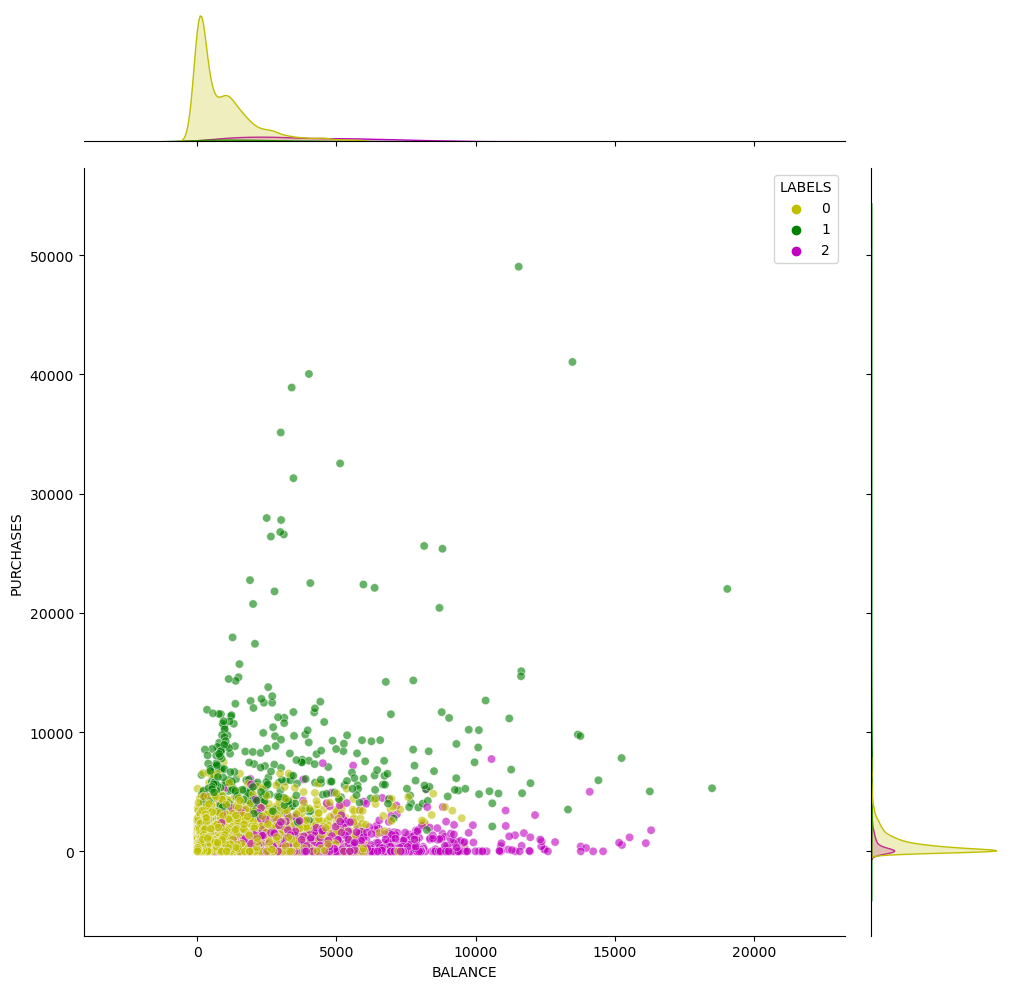

In [21]:
colorful_scatter(raw_df)

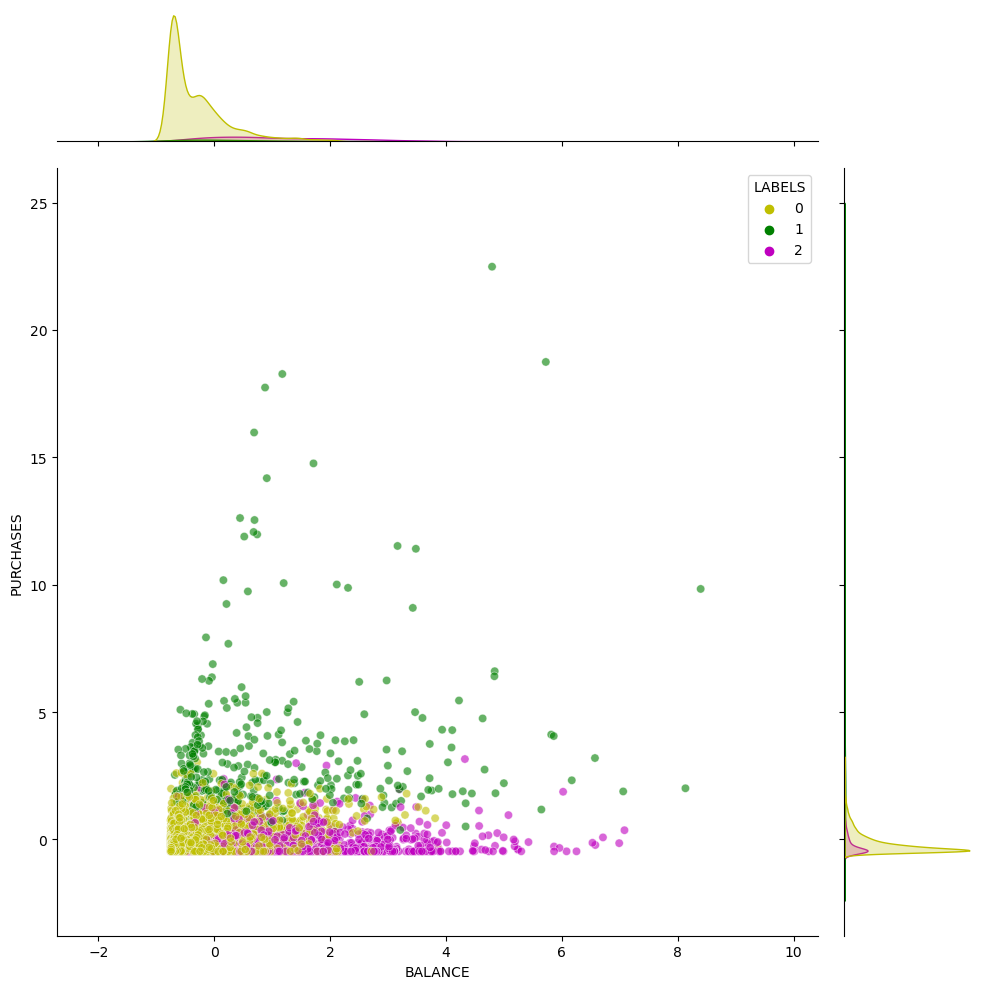

In [22]:
colorful_scatter(normalized_df)